In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score

from reportlab.lib.units import inch
from reportlab.lib import colors
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Table, TableStyle

from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter
from PIL import Image





In [2]:
index_bus = [4,6,8,10,11,14]
index_error = ["ABCG", "ABC", "AB", "BCG", "CG"]

for i in index_bus:
    globals()[f"ABCG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="ABCG", header=0)
    
for i in index_bus:
    globals()[f"ABC{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="ABC", header=0)

for i in index_bus:
    globals()[f"AB{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="AB", header=0)
    
for i in index_bus:
    globals()[f"BCG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="BCG", header=0)
    
for i in index_bus:
    globals()[f"CG{i}"] = pd.read_excel(f"Datos{i}.xlsx", sheet_name="CG", header=0)



In [3]:
Fallos_ABCG = []
Fallos_ABC = [] 
Fallos_AB = []
Fallos_BCG = []
Fallos_CG = []

for i in index_bus:
    Fallos_ABCG.append(globals()[f"ABCG{i}"])
    Fallos_ABC.append(globals()[f"ABC{i}"])
    Fallos_AB.append(globals()[f"AB{i}"]) 
    Fallos_BCG.append(globals()[f"BCG{i}"]) 
    Fallos_CG.append(globals()[f"CG{i}"]) 


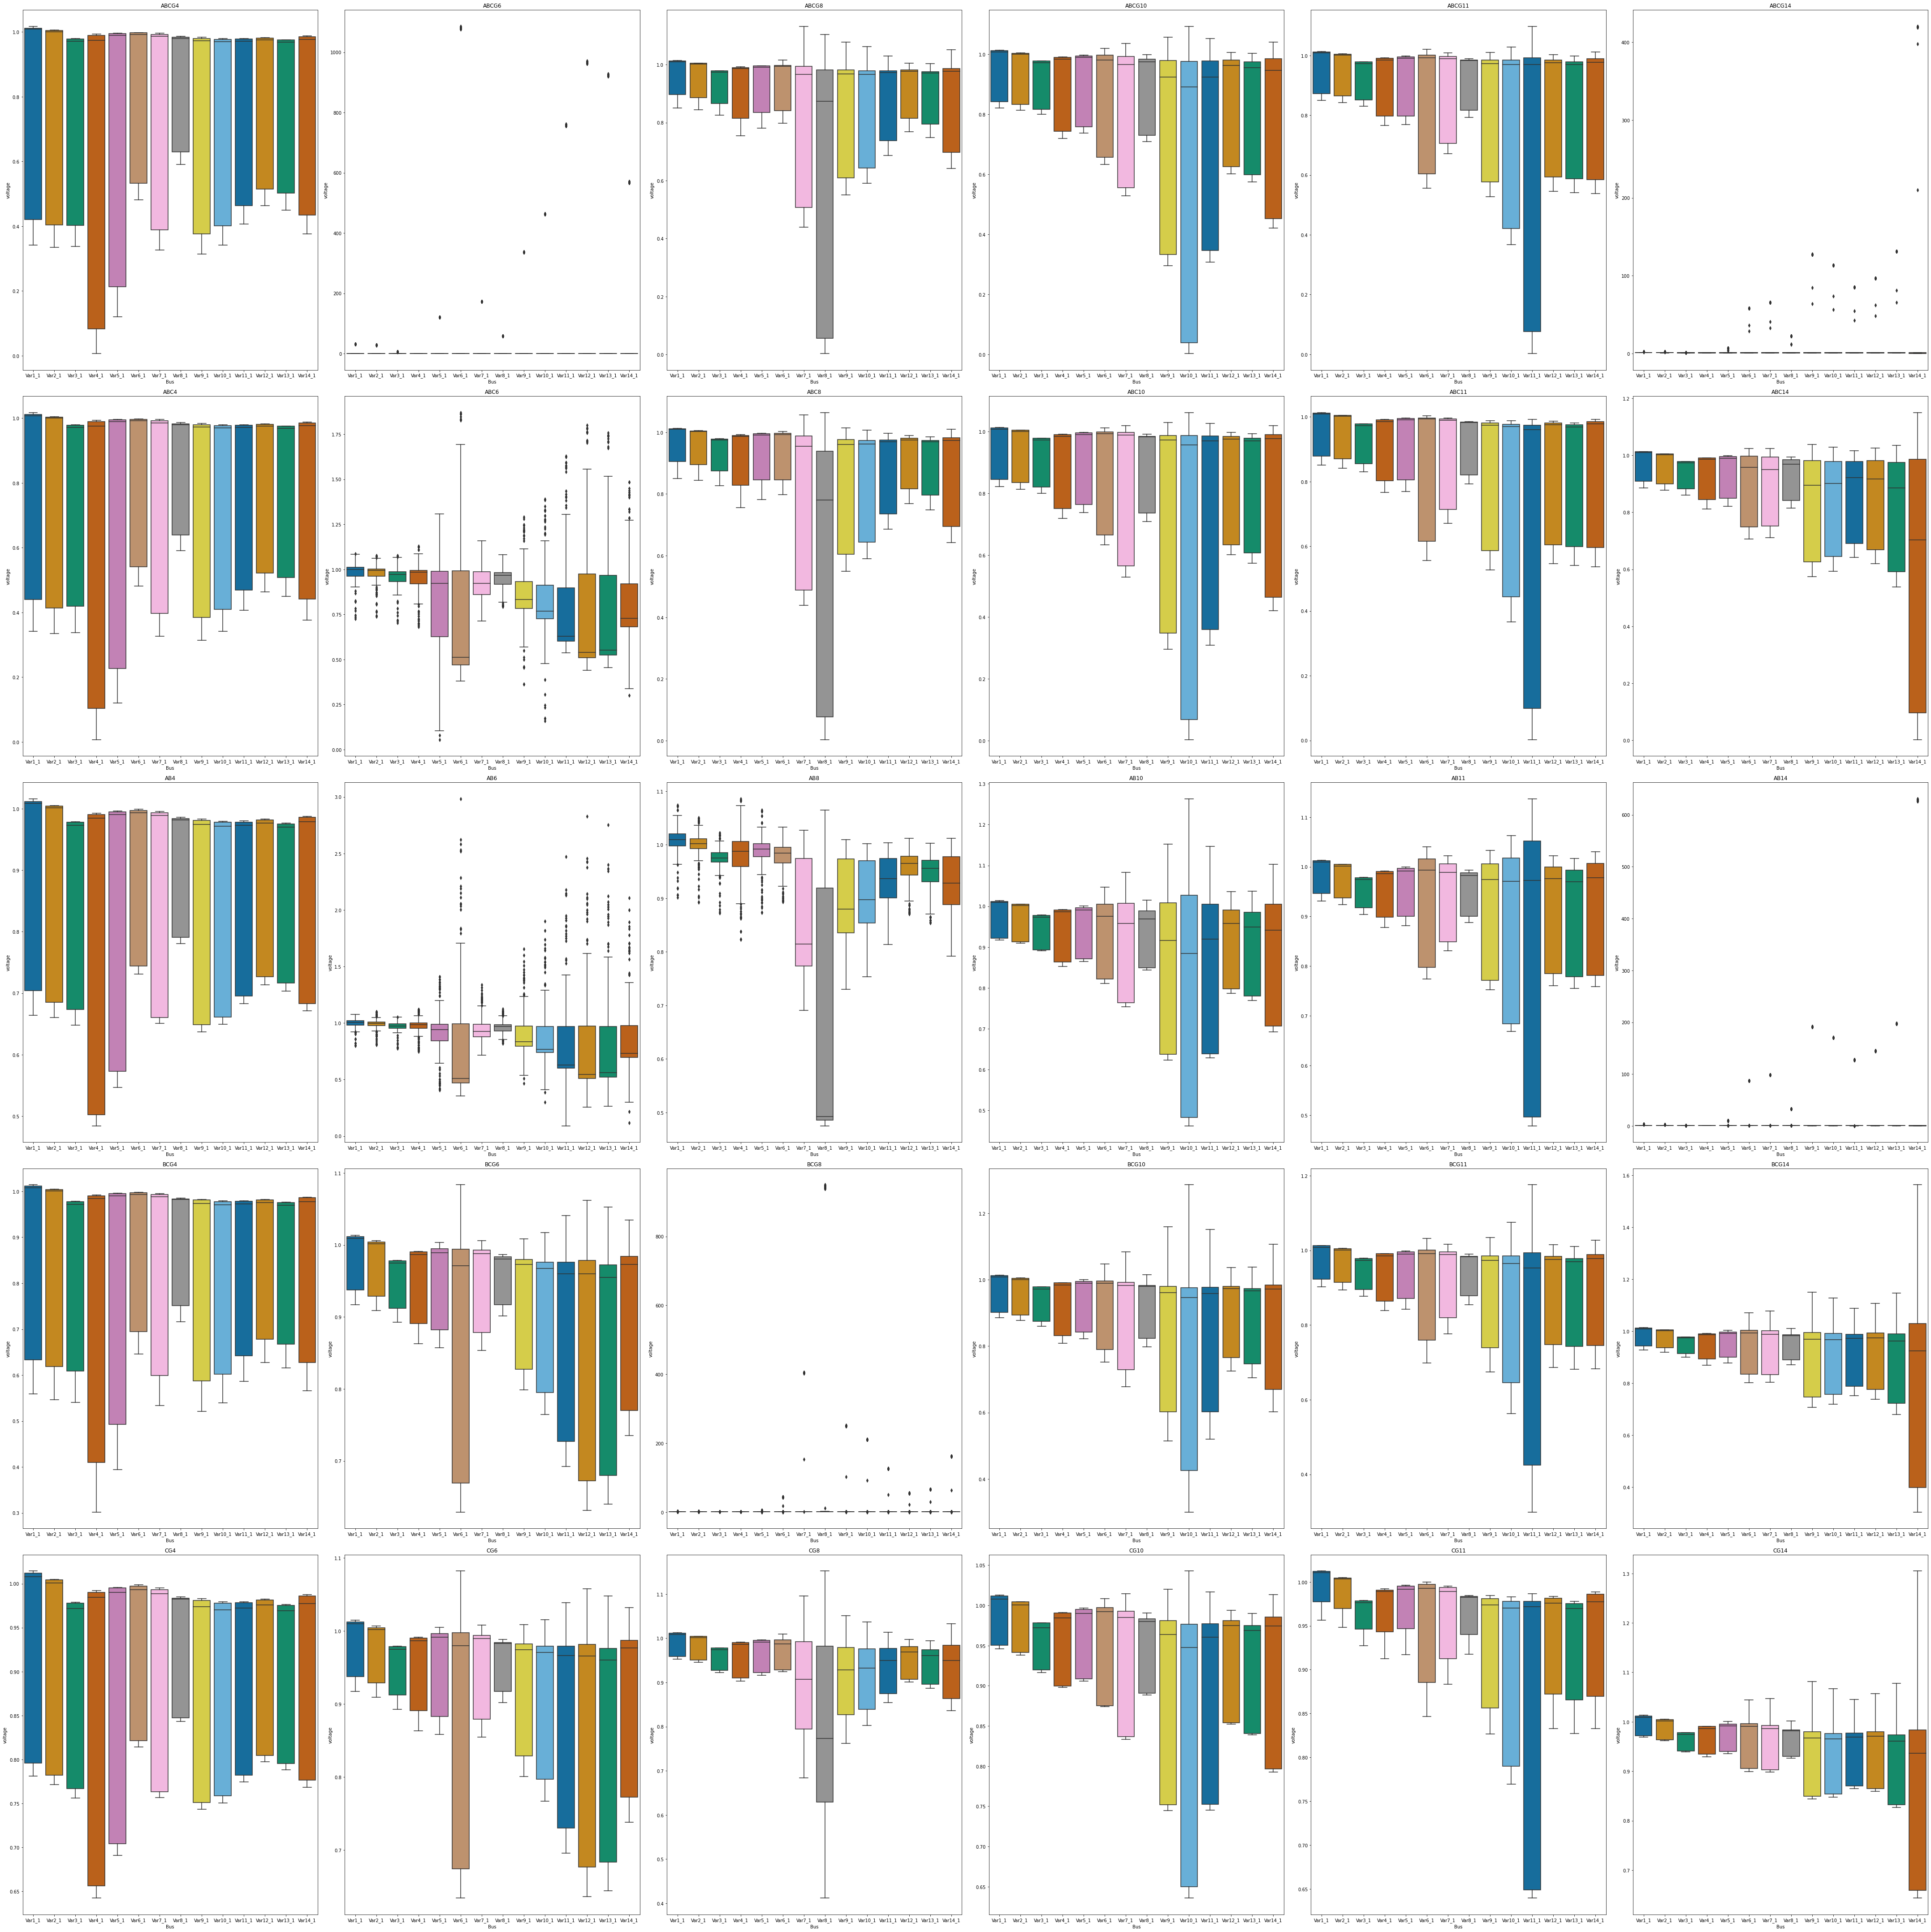

In [4]:
variables = ['Var1_1', 'Var2_1', 'Var3_1', 'Var4_1', 'Var5_1', 'Var6_1', 'Var7_1', 'Var8_1', 'Var9_1', 'Var10_1', 'Var11_1', 'Var12_1', 'Var13_1', 'Var14_1']

# crear gráfica de caja con seaborn
fig, axs = plt.subplots(nrows=5, ncols=6, figsize=(60,60))

for i in range(len(index_error)):
    for j in range(len(index_bus)):
        ax = axs[i][j]
        sns.boxplot(data=globals()[f"{index_error[i]}{index_bus[j]}"][variables], palette='colorblind',ax=ax)
        ax.set_title(f"{index_error[i]}{index_bus[j]}")
        ax.set_xlabel("Bus")
        ax.set_ylabel("voltage")
        
plt.tight_layout()
plt.savefig('gráfica_de_caja.PDF')
plt.show()

In [5]:
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"ABCG{i}"])
    globals()[f"ABCG{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"ABC{i}"])
    globals()[f"ABC{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"AB{i}"])
    globals()[f"AB{i}"].loc[:, 'y'] = y

for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"BCG{i}"])
    globals()[f"BCG{i}"].loc[:, 'y'] = y
    
for i in index_bus:
    valor = i
    y = [valor] * len(globals()[f"CG{i}"])
    globals()[f"CG{i}"].loc[:, 'y'] = y
    

In [6]:

df0 = pd.concat(Fallos_ABCG, axis=0)
df1 = pd.concat(Fallos_ABC, axis=0)
df2 = pd.concat(Fallos_AB, axis=0)
df3 = pd.concat(Fallos_BCG, axis=0)
df4 = pd.concat(Fallos_CG, axis=0)

# Mostrar el shape del DataFrame resultante

df0 = df0.dropna()
df1 = df1.dropna()
df2 = df2.dropna()
df3 = df3.dropna()
df4 = df4.dropna()
"""
df0 = df0.sample(frac = 1)
df1 = df1.sample(frac = 1)
df2 = df2.sample(frac = 1)
df3 = df3.sample(frac = 1)
df4 = df4.sample(frac = 1)
"""
print(df0.shape)
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)


(1152, 29)
(1152, 29)
(1152, 29)
(1152, 29)
(1152, 29)


In [7]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
X_train0, X_test0, y_train0, y_test0 = train_test_split(df0.iloc[:,:-1], df0.iloc[:,-1], test_size=0.2, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df1.iloc[:,:-1], df1.iloc[:,-1], test_size=0.2, random_state=40)
X_train2, X_test2, y_train2, y_test2 = train_test_split(df2.iloc[:,:-1], df2.iloc[:,-1], test_size=0.2, random_state=45)
X_train3, X_test3, y_train3, y_test3 = train_test_split(df3.iloc[:,:-1], df3.iloc[:,-1], test_size=0.2, random_state=43)
X_train4, X_test4, y_train4, y_test4 = train_test_split(df4.iloc[:,:-1], df4.iloc[:,-1], test_size=0.2, random_state=46)

logisticRegression: 0.5497835497835498
Precision per class: [0.66666667 0.29347826 0.59375    0.88888889 0.77777778 0.7826087 ]
Recall per class: [0.7027027  0.58695652 0.48717949 0.42105263 0.46666667 0.69230769]
logisticRegression: 0.6147186147186147
Precision per class: [0.8        0.65384615 0.7254902  1.         0.84210526 0.35      ]
Recall per class: [0.2        0.87179487 0.84090909 0.45238095 0.48484848 0.84848485]


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



logisticRegression: 0.36363636363636365
Precision per class: [0.         0.33333333 0.88888889 0.         0.35       0.17283951]
Recall per class: [0.         0.91176471 0.7804878  0.         0.15909091 0.33333333]
logisticRegression: 0.48484848484848486
Precision per class: [0.59090909 0.75       0.22764228 1.         0.95454545 0.625     ]
Recall per class: [0.38235294 0.5        0.68292683 0.48780488 0.47727273 0.36585366]
logisticRegression: 0.6363636363636364
Precision per class: [0.79411765 0.61818182 0.78787879 0.43243243 0.56097561 0.67741935]
Recall per class: [0.65853659 0.79069767 0.66666667 0.44444444 0.62162162 0.6       ]


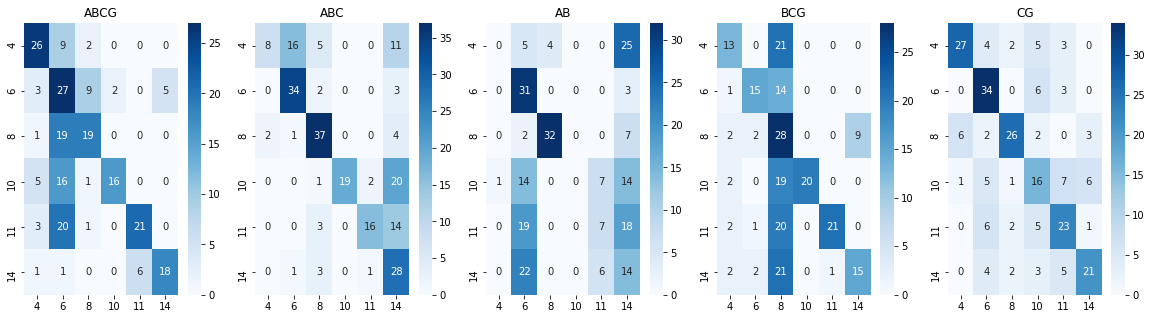

In [41]:
# Importar las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.io as pio


errores=["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus":index_bus}
recall_scores = {}

# Crear el modelo de regresión logística con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

for i in Nmodels:
    globals()[f"clf{i}"] = LogisticRegression(random_state=i, max_iter=1000, solver='lbfgs')

# Escalar los datos antes de entrenar el modelo
scaler = StandardScaler()
for i in Nmodels:
    X_train_scaled = scaler.fit_transform(globals()[f"X_train{i}"])
    globals()[f"clf{i}"].fit(X_train_scaled, globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba y evaluar la precisión del modelo
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    X_test_scaled = scaler.transform(globals()[f"X_test{i}"])
    globals()[f"y_pred{i}"] = globals()[f"clf{i}"].predict(X_test_scaled)
    globals()[f"logreg_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    
    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)

    # Guardar los valores en el diccionario
    precision_scores[f"precision{index_error[i]} fault LogisticRegression"] = precision_per_class
    recall_scores[f"recall_logreg{i}"] = recall_per_class
    
    globals()[f"conf_matrix_logreg{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"logisticRegression: {globals()[f'logreg_acc{i}']}")
    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_logreg{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=index_bus, yticklabels=index_bus)

fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])
    
plt.savefig('gráfica_de_LR_confusion.PDF')
plt.show()
fig.show()


Decision Tree: 0.8181818181818182
Precision per class: [0.79487179 0.90243902 0.97368421 0.82352941 0.80952381 0.59459459]
Recall per class: [0.83783784 0.80434783 0.94871795 0.73684211 0.75555556 0.84615385]
Decision Tree: 0.8571428571428571
Precision per class: [0.75609756 0.94736842 1.         0.82926829 0.77419355 0.81578947]
Recall per class: [0.775      0.92307692 0.95454545 0.80952381 0.72727273 0.93939394]
Decision Tree: 0.8917748917748918
Precision per class: [0.81818182 0.97058824 0.94736842 0.91176471 0.75       1.        ]
Recall per class: [0.79411765 0.97058824 0.87804878 0.86111111 0.88636364 0.95238095]
Decision Tree: 0.8138528138528138
Precision per class: [0.7027027  0.86666667 0.975      0.77272727 0.83333333 0.75      ]
Recall per class: [0.76470588 0.86666667 0.95121951 0.82926829 0.68181818 0.80487805]
Decision Tree: 0.8268398268398268
Precision per class: [0.8372093  0.9        0.97368421 0.75757576 0.725      0.75675676]
Recall per class: [0.87804878 0.8372093  

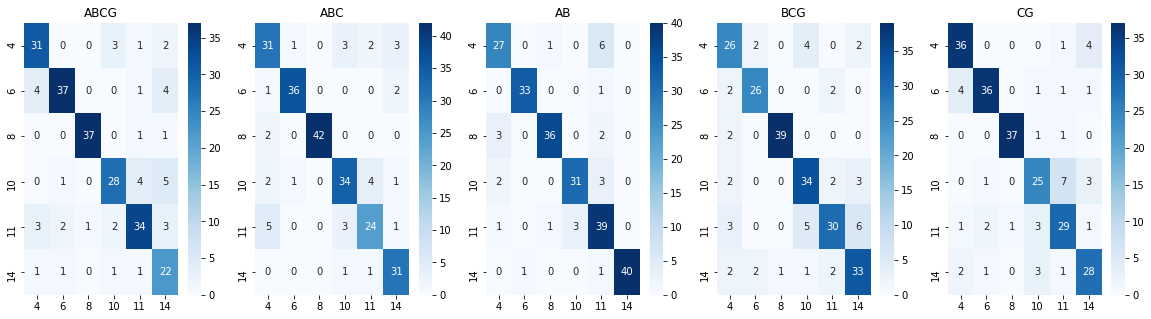

In [49]:
# Importar DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio



errores=["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus":index_bus}
recall_scores = {}

# Crear el modelo de regresión logística con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]


# Crear el clasificador
for i in Nmodels:
    globals()[f"clf_dt{i}"] = DecisionTreeClassifier()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf_dt{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred_dt{i}"] = globals()[f"clf_dt{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"dt_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred_dt{i}"])
    globals()[f"conf_matrix_deciTree{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred_dt{i}"])
    print(f"Decision Tree: {globals()[f'dt_acc{i}']}")
    axs[i].set_title(index_error[i])
    sns.heatmap(globals()[f"conf_matrix_deciTree{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=index_bus, yticklabels=index_bus)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred_dt{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred_dt{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_dt{i}"] = precision_per_class
    globals()[f"recall_dt{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{index_error[i]} fault DecisionTreeClassifier"] = precision_per_class
    recall_scores[f"recall_deciTree{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_Tr_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de DecisionTreeClassifier
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


Precisión de Random Forest: 0.8658008658008658
Precision per class: [0.81395349 0.90909091 0.97297297 0.94117647 0.89189189 0.66666667]
Recall per class: [0.94594595 0.86956522 0.92307692 0.84210526 0.73333333 0.92307692]
Precisión de Random Forest: 0.8917748917748918
Precision per class: [0.85       1.         0.91489362 0.925      0.68421053 1.        ]
Recall per class: [0.85       0.8974359  0.97727273 0.88095238 0.78787879 0.93939394]
Precisión de Random Forest: 0.8961038961038961
Precision per class: [0.74285714 1.         0.97368421 0.91176471 0.79591837 0.97560976]
Recall per class: [0.76470588 1.         0.90243902 0.86111111 0.88636364 0.95238095]
Precisión de Random Forest: 0.8701298701298701
Precision per class: [0.91428571 0.83870968 1.         0.87179487 0.73469388 0.89473684]
Recall per class: [0.94117647 0.86666667 0.95121951 0.82926829 0.81818182 0.82926829]
Precisión de Random Forest: 0.8787878787878788
Precision per class: [0.86046512 0.84444444 1.         0.96666667

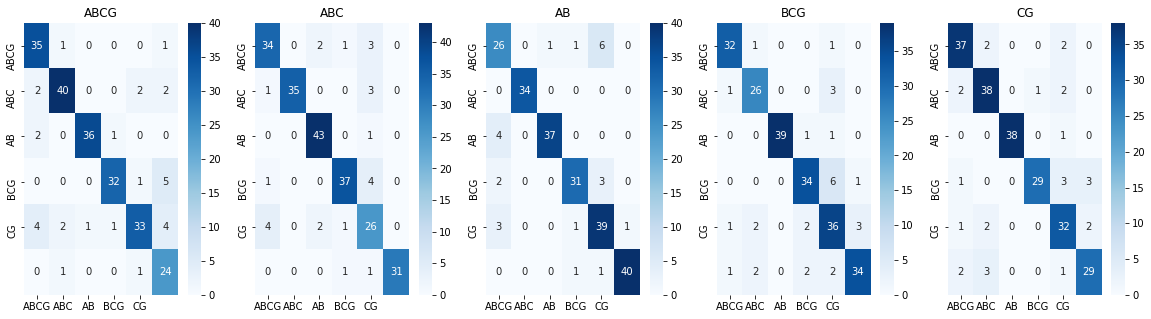

In [50]:
# Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

# Crear el modelo RandomForestClassifier con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"clf_rf{i}"] = RandomForestClassifier()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf_rf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred_rf{i}"] = globals()[f"clf_rf{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"rf_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred_rf{i}"])
    globals()[f"conf_matrix_randTree{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred_rf{i}"])
    print(f"Precisión de Random Forest: {globals()[f'rf_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_randTree{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred_rf{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred_rf{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_rf{i}"] = precision_per_class
    globals()[f"recall_rf{i}"] = recall_per_class

    # Guardar los valores en el diccionario
    precision_scores[f"precision{errores[i]} fault RandomForestClassifier"] = precision_per_class
    recall_scores[f"recall_rf{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_RanFor_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de RandomForestClassifier
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


Support Vector Machine: 0.19913419913419914


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Precision per class: [0.16666667 1.         0.         0.         0.         1.        ]
Recall per class: [1.         0.15217391 0.         0.         0.         0.07692308]
Support Vector Machine: 0.5584415584415584
Precision per class: [1.         1.         1.         1.         0.24444444 1.        ]
Recall per class: [0.35       0.71794872 0.43181818 0.38095238 1.         0.57575758]
Support Vector Machine: 0.19047619047619047


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Precision per class: [0.15668203 0.66666667 0.         0.         0.         1.        ]
Recall per class: [1.         0.23529412 0.         0.         0.         0.04761905]
Support Vector Machine: 0.15151515151515152


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Precision per class: [0.         0.13274336 1.         0.         0.         0.        ]
Recall per class: [0.         1.         0.12195122 0.         0.         0.        ]
Support Vector Machine: 0.48484848484848486
Precision per class: [1.         1.         1.         1.         1.         0.22727273]
Recall per class: [0.43902439 0.39534884 0.48717949 0.33333333 0.2972973  1.        ]


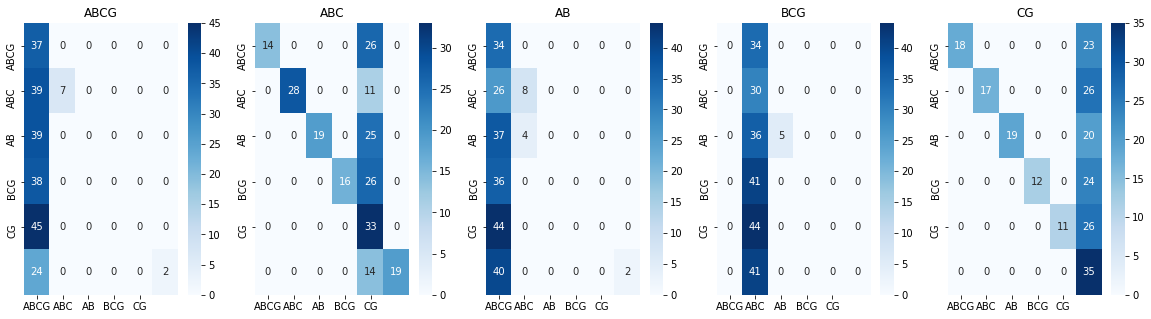

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

# Crear el modelo SVM con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"clf_svm{i}"] = SVC()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"clf_svm{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
for i in Nmodels:
    globals()[f"y_pred_svm{i}"] = globals()[f"clf_svm{i}"].predict(globals()[f"X_test{i}"])

# Evaluar la precisión del modelo
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"svm_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred_svm{i}"])
    globals()[f"conf_matrix_SVC{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred_svm{i}"])
    print(f"Support Vector Machine: {globals()[f'svm_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_SVC{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred_svm{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred_svm{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_svm{i}"] = precision_per_class
    globals()[f"recall_svm{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{errores[i]} fault SVM"] = precision_per_class
    recall_scores[f"recall_svm{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_SVC_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de SVM
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


D:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.



MLPC: 0.45454545454545453
Precision per class: [0.5        0.27777778 0.36708861 1.         0.8        1.        ]
Recall per class: [0.16216216 0.54347826 0.74358974 0.42105263 0.44444444 0.34615385]
MLPC: 0.683982683982684
Precision per class: [0.86666667 0.70212766 0.71186441 0.96428571 1.         0.42647059]
Recall per class: [0.325      0.84615385 0.95454545 0.64285714 0.42424242 0.87878788]
MLPC: 0.341991341991342
Precision per class: [0.06666667 0.32926829 1.         0.         0.11764706 0.17721519]
Recall per class: [0.02941176 0.79411765 0.85365854 0.         0.04545455 0.33333333]
MLPC: 0.329004329004329
Precision per class: [1.         0.91666667 0.18831169 1.         1.         0.12121212]
Recall per class: [0.32352941 0.36666667 0.70731707 0.09756098 0.38636364 0.09756098]
MLPC: 0.8311688311688312
Precision per class: [0.84210526 0.90697674 1.         0.82352941 0.65306122 0.82857143]
Recall per class: [0.7804878  0.90697674 0.82051282 0.77777778 0.86486486 0.82857143]


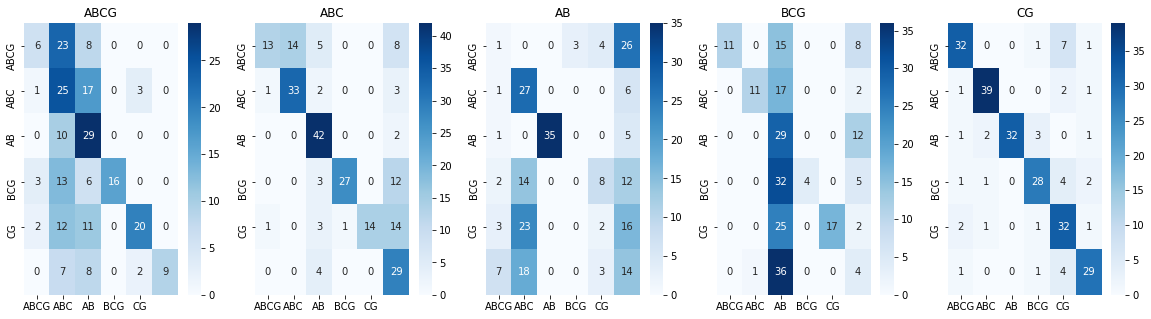

In [52]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

# Crear el modelo MLPClassifier con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"mlpc{i}"] = MLPClassifier(random_state=i, max_iter=1000)

# Escalar los datos antes de entrenar el modelo MLPClassifier
scaler = StandardScaler()
for i in Nmodels:
    X_train_scaled = scaler.fit_transform(globals()[f"X_train{i}"])
    globals()[f"mlpc{i}"].fit(X_train_scaled, globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    X_test_scaled = scaler.transform(globals()[f"X_test{i}"])
    globals()[f"y_pred{i}"] = globals()[f"mlpc{i}"].predict(X_test_scaled)

    # Evaluar la precisión del modelo
    globals()[f"mlpc_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_mlpc{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"MLPC: {globals()[f'mlpc_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_mlpc{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_mlpc{i}"] = precision_per_class
    globals()[f"recall_mlpc{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{errores[i]} fault MLPClassifier"] = precision_per_class
    recall_scores[f"recall_mlpc{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_MLPC_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de MLPClassifier
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


Precisión de GradientBoosting: 0.7922077922077922
Precision per class: [0.77272727 0.77272727 0.97142857 0.75675676 0.86842105 0.60606061]
Recall per class: [0.91891892 0.73913043 0.87179487 0.73684211 0.73333333 0.76923077]
Precisión de GradientBoosting: 0.7878787878787878
Precision per class: [0.67391304 0.97058824 0.90697674 0.68181818 0.68571429 0.86206897]
Recall per class: [0.775      0.84615385 0.88636364 0.71428571 0.72727273 0.75757576]
Precisión de GradientBoosting: 0.8398268398268398
Precision per class: [0.79411765 0.91176471 0.81818182 0.725      0.94444444 0.86046512]
Recall per class: [0.79411765 0.91176471 0.87804878 0.80555556 0.77272727 0.88095238]
Precisión de GradientBoosting: 0.7835497835497836
Precision per class: [0.75       0.73333333 0.97368421 0.84210526 0.62790698 0.78571429]
Recall per class: [0.88235294 0.73333333 0.90243902 0.7804878  0.61363636 0.80487805]
Precisión de GradientBoosting: 0.7792207792207793
Precision per class: [0.66071429 0.94594595 0.8974

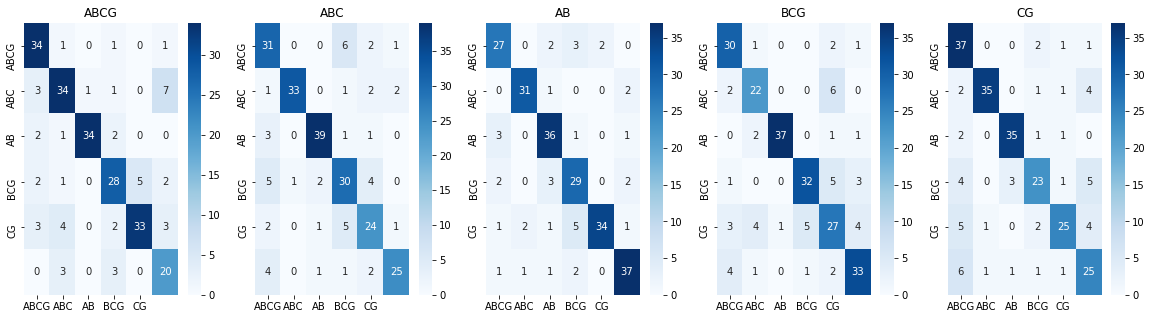

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

# Crear el modelo GradientBoostingClassifier con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"gbclf{i}"] = GradientBoostingClassifier(n_estimators=20, learning_rate=1, max_features=2, max_depth=2, random_state=0)

# Entrenar el modelo
for i in Nmodels:
    globals()[f"gbclf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"gbclf{i}"].predict(globals()[f"X_test{i}"])

    # Evaluar la precisión del modelo
    globals()[f"gb_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_gauss{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Precisión de GradientBoosting: {globals()[f'gb_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_gauss{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_gb{i}"] = precision_per_class
    globals()[f"recall_gb{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{errores[i]} fault GradientBoostingClassifier"] = precision_per_class
    recall_scores[f"recall_gb{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_GB_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de GradientBoostingClassifier
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


Gaussian Naive Bayes: 0.3463203463203463


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Precision per class: [0.9047619  0.77777778 0.26530612 0.36363636 0.14285714 0.        ]
Recall per class: [0.51351351 0.15217391 1.         0.31578947 0.06666667 0.        ]
Gaussian Naive Bayes: 0.48917748917748916
Precision per class: [1.         1.         0.31884058 0.5        0.66666667 0.63157895]
Recall per class: [0.35       0.64102564 1.         0.38095238 0.06060606 0.36363636]
Gaussian Naive Bayes: 0.44155844155844154
Precision per class: [0.81818182 0.96551724 0.39583333 0.24528302 0.30769231 0.66666667]
Recall per class: [0.26470588 0.82352941 0.92682927 0.36111111 0.27272727 0.04761905]
Gaussian Naive Bayes: 0.3246753246753247
Precision per class: [0.22222222 0.208      1.         0.53571429 0.58823529 0.55      ]
Recall per class: [0.23529412 0.86666667 0.12195122 0.36585366 0.22727273 0.26829268]
Gaussian Naive Bayes: 0.4588744588744589
Precision per class: [1.         0.80952381 1.         0.52       0.58333333 0.1875    ]
Recall per class: [0.43902439 0.39534884 0.69

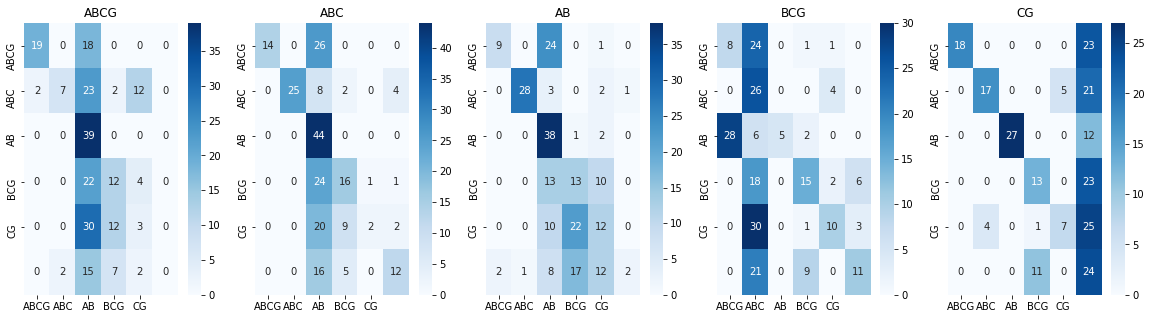

In [56]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"gnbclf{i}"] = GaussianNB()

# Entrenar el modelo
for i in Nmodels:
    globals()[f"gnbclf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"gnbclf{i}"].predict(globals()[f"X_test{i}"])

    # Evaluar la precisión del modelo
    globals()[f"gnb_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_GNB{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"Gaussian Naive Bayes: {globals()[f'gnb_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_GNB{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_gnb{i}"] = precision_per_class
    globals()[f"recall_gnb{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{errores[i]} fault GaussianNB"] = precision_per_class
    recall_scores[f"recall_gnb{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_GNB_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de Gaussian Naive Bayes
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()


AdaBoost: 0.48917748917748916
Precision per class: [0.48484848 0.7        0.578125   0.48148148 0.7        0.21052632]
Recall per class: [0.43243243 0.30434783 0.94871795 0.34210526 0.46666667 0.46153846]
AdaBoost: 0.5930735930735931
Precision per class: [0.42       1.         0.925      0.85714286 0.34177215 0.72      ]
Recall per class: [0.525      0.41025641 0.84090909 0.42857143 0.81818182 0.54545455]
AdaBoost: 0.43722943722943725
Precision per class: [0.59259259 0.26388889 0.78787879 0.31428571 0.41666667 0.5       ]
Recall per class: [0.47058824 0.55882353 0.63414634 0.30555556 0.34090909 0.33333333]
AdaBoost: 0.4458874458874459
Precision per class: [0.41860465 0.57142857 0.37254902 0.34782609 0.41176471 0.89473684]
Recall per class: [0.52941176 0.4        0.46341463 0.3902439  0.47727273 0.41463415]
AdaBoost: 0.5844155844155844
Precision per class: [0.30769231 0.75       0.96666667 0.41860465 0.37777778 0.88461538]
Recall per class: [0.29268293 0.8372093  0.74358974 0.5        0

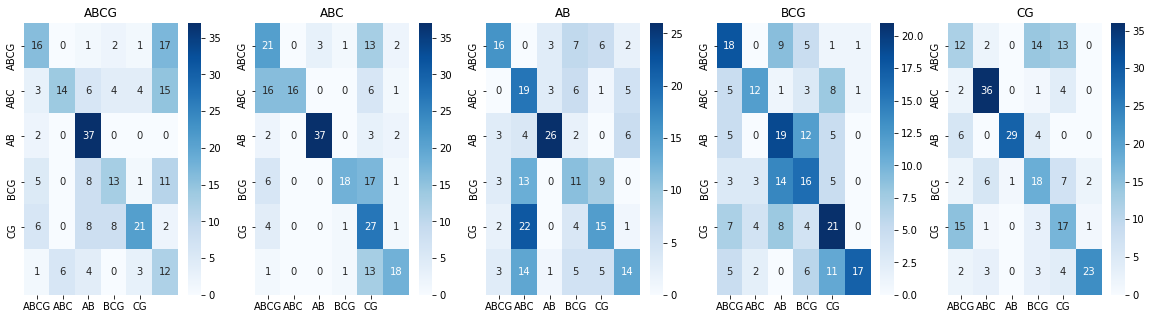

In [57]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import plotly.graph_objects as go
import plotly.io as pio

errores = ["ABCG", "ABC", "AB", "BCG", "CG"]

precision_scores = {"error in bus": index_bus}
recall_scores = {}

Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador AdaBoost con las opciones adecuadas
Nmodels = [0, 1, 2, 3, 4]

# Crear el clasificador
for i in Nmodels:
    globals()[f"adaclf{i}"] = AdaBoostClassifier(n_estimators=100)

# Entrenar el modelo
for i in Nmodels:
    globals()[f"adaclf{i}"].fit(globals()[f"X_train{i}"], globals()[f"y_train{i}"])

# Realizar predicciones sobre el conjunto de prueba
fig, axs = plt.subplots(ncols=5, figsize=(20, 5))

for i in Nmodels:
    globals()[f"y_pred{i}"] = globals()[f"adaclf{i}"].predict(globals()[f"X_test{i}"])

    # Evaluar la precisión del modelo
    globals()[f"ab_acc{i}"] = accuracy_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    globals()[f"conf_matrix_Ada{i}"] = confusion_matrix(globals()[f"y_test{i}"], globals()[f"y_pred{i}"])
    print(f"AdaBoost: {globals()[f'ab_acc{i}']}")
    axs[i].set_title(errores[i])
    sns.heatmap(globals()[f"conf_matrix_Ada{i}"], annot=True, cmap='Blues', fmt='g', ax=axs[i], xticklabels=errores, yticklabels=errores)

    # Calcular precisión y recall para cada clase (etiqueta)
    precision_per_class = precision_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)
    recall_per_class = recall_score(globals()[f"y_test{i}"], globals()[f"y_pred{i}"], average=None)

    # Guardar los valores en variables
    globals()[f"precision_ab{i}"] = precision_per_class
    globals()[f"recall_ab{i}"] = recall_per_class

    # Guardar los valores en los diccionarios
    precision_scores[f"precision{errores[i]} fault AdaBoost"] = precision_per_class
    recall_scores[f"recall_ab{i}"] = recall_per_class

    print(f'Precision per class: {precision_per_class}')
    print(f'Recall per class: {recall_per_class}')

plt.savefig('gráfica_de_ada_confusion.PDF')
plt.show()

# Crear una tabla con los resultados de AdaBoost
fig = go.Figure(data=[go.Table(
    header=dict(values=list(precision_scores.keys()),
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=list(precision_scores.values()),
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left'))
])

# Mostrar la tabla
fig.show()



In [ ]:
# Definir los nombres de los modelos
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Classifier", "MLPC", "Gradient Boosting", "Gaussian Naive Bayes", "AdaBoost"]

# Lista de listas para almacenar las métricas
listas_modelos = []

# Nombres de las métricas
LM = ["logreg_acc", "dt_acc", "rf_acc", "svm_acc", "mlpc_acc", "gb_acc", "gnb_acc", "ab_acc"]

for i in range(len(LM)):
    model_metrics = [models[i]]

    for j in range(5):
        # Precisión
        precision = precision_score(globals()[f"y_test{j}"], globals()[f"y_pred{j}"])
        # Recall
        recall = recall_score(globals()[f"y_test{j}"], globals()[f"y_pred{j}"])

        # Agregar las métricas al modelo
        model_metrics.extend([round(precision, 6), round(recall, 6)])

    listas_modelos.append(model_metrics)

# Crear un DataFrame de pandas con las métricas
df = pd.DataFrame(listas_modelos, columns=["Model", "Precision 1", "Recall 1", "Precision 2", "Recall 2", "Precision 3", "Recall 3", "Precision 4", "Recall 4", "Precision 5", "Recall 5"])

# Imprimir el DataFrame
print(df)


In [ ]:
# Definir los nombres de los modelos y las precisión
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Classifier", "MLPC", "Gradient Boosting", "Gaussian Naive Bayes", "AdaBoost"]
listas_modelos=[]
LM = ["logreg_acc", "dt_acc", "rf_acc", "svm_acc", "mlpc_acc", "gb_acc", "gnb_acc", "ab_acc"]
for i in range(len(LM)):
    globals()[f"lista{LM[i]}"] = [f"{models[i]}"]
    for j in range(5):
        globals()[f"lista{LM[i]}"].append(round(globals()[f"{LM[i]}{j}"],6))
    listas_modelos.append(globals()[f"lista{LM[i]}"])



In [ ]:
from tabulate import tabulate

print(tabulate(listas_modelos, headers = ["Model", "acurrency ABCG", "acurrency ABC", "acurrency AB", "acurrency BCG", "acurrency CG"] ))

In [ ]:
listas_modelos.insert(0,["Model", "accuracy ABCG", "accuracy ABC", "accuracy AB", "accuracy BCG", "accuracy CG"])

In [ ]:
half_letter = (8*inch, 2.7*inch)
doc = SimpleDocTemplate("redult_table_models.pdf", pagesize=half_letter, leftMargin=0, rightMargin=0, topMargin=0, bottomMargin=0)
elements = []


colWidths=(1.8*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch)
t=Table(listas_modelos, colWidths=colWidths)

t.setStyle(TableStyle([('BACKGROUND',(1,0),(-1,-1),colors.lightgoldenrodyellow),
('TEXTCOLOR',(1,2),(-1,2),colors.red),
('TEXTCOLOR',(1,3),(-1,3),colors.red),
('TEXTCOLOR',(1,6),(-1,6),colors.red),
('BOX', (0,0), (-1,-1), 0.25, colors.black),
('GRID',(0,0),(-1,-1),1,colors.green)]))
elements.append(t)
# write the document to disk
doc.build(elements)

In [ ]:
# Definir los nombres de los modelos y las precisión
models = ["Logistic Regression", "Decision Tree", "Random Forest", "Support Vector Classifier", "MLPC", "Gradient Boosting", "AdaBoost"]
listas_modelos=[]
LM = ["logreg_acc", "dt_acc", "rf_acc", "svm_acc", "mlpc_acc", "gb_acc", "ab_acc"]
for i in range(len(LM)):
    globals()[f"lista{LM[i]}"] = [f"{models[i]}"]
    for j in range(5):
        globals()[f"lista{LM[i]}"].append(round(globals()[f"{LM[i]}{j}"],6))
    listas_modelos.append(globals()[f"lista{LM[i]}"])


In [ ]:
from tabulate import tabulate

print(tabulate(listas_modelos, headers = ["Model", "acurrency ABCG", "acurrency ABC", "acurrency AB", "acurrency BCG", "acurrency CG"] ))

In [ ]:
listas_modelos.insert(0,["Model", "accuracy ABCG", "accuracy ABC", "accuracy AB", "accuracy BCG", "accuracy CG"])

In [ ]:
half_letter = (8*inch, 2.7*inch)
doc = SimpleDocTemplate("redult_table_models.pdf", pagesize=half_letter, leftMargin=0, rightMargin=0, topMargin=0, bottomMargin=0)
elements = []


colWidths=(1.8*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch, 1.2*inch)
t=Table(listas_modelos, colWidths=colWidths)

t.setStyle(TableStyle([('BACKGROUND',(1,0),(-1,-1),colors.lightgoldenrodyellow),
('TEXTCOLOR',(1,2),(-1,2),colors.red),
('TEXTCOLOR',(1,3),(-1,3),colors.red),
('TEXTCOLOR',(1,6),(-1,6),colors.red),
('BOX', (0,0), (-1,-1), 0.25, colors.black),
('GRID',(0,0),(-1,-1),1,colors.green)]))
elements.append(t)
# write the document to disk
doc.build(elements)

In [ ]:
from reportlab.pdfgen import canvas
from reportlab.lib.pagesizes import letter

c = canvas.Canvas('report.pdf', pagesize=letter)

# Definimos la posición y tamaño de cada imagen
pos_x = 50
pos_y = 700
img_width = 500
img_height = 300

# Agregamos cada imagen y su nombre encima
images = [('gráfica_de_LR_confusion.PDF', 'Matriz de Confusión - Regresión Logística'),
          ('gráfica_de_Tr_confusion.PDF', 'Matriz de Confusión - Árbol de Decisión'),
          ('gráfica_de_RanFor_confusion.PDF', 'Matriz de Confusión - Random Forest'),
          ('gráfica_de_SVC_confusion.PDF', 'Matriz de Confusión - SVM'),
          ('gráfica_de_MLPC_confusion.PDF', 'Matriz de Confusión - MLPC'),
          ('gráfica_de_GB_confusion.PDF', 'Matriz de Confusión - Gradient Boosting'),
          ('gráfica_de_GNB_confusion.PDF', 'Matriz de Confusión - Naive Bayes'),
          ('gráfica_de_ada_confusion.PDF', 'Matriz de Confusión - AdaBoost')]

for i, (image_path, image_name) in enumerate(images):
    c.drawString(pos_x, pos_y-20*i, image_name)
    c.drawImage(image_path, pos_x, pos_y-20*i-30, width=img_width, height=img_height)

c.save()